In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#1. Conner


## Exercise Canny

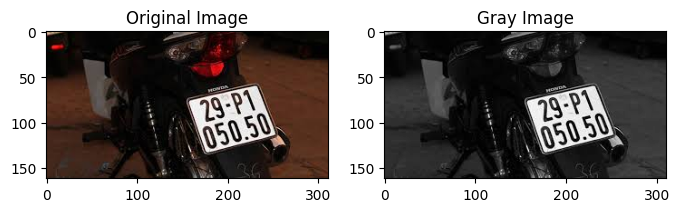

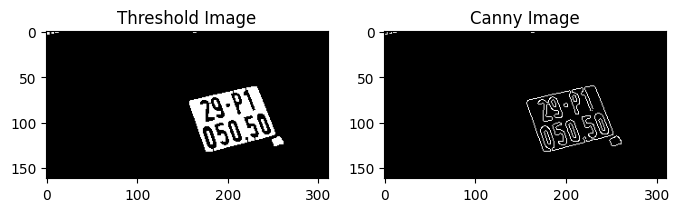

In [ ]:
kernel = np.ones((3, 3))

#Read Image
plate = cv2.cvtColor(cv2.imread('/content/plate.jpg'), cv2.COLOR_BGR2RGB)

#Convert gray image
plate_gray = cv2.cvtColor(plate, cv2.COLOR_RGB2GRAY)

#Using Threshold
_, plate_th = cv2.threshold(plate_gray, 132, 255, cv2.THRESH_BINARY)
plate_th = cv2.morphologyEx(plate_th, cv2.MORPH_OPEN, kernel)

#Using Canny
#pl_blur = cv2.blur(plate_th, (7, 7))
pl_canny = cv2.Canny(plate_th, 100, 200)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(plate)

plt.subplot(2, 2, 2)
plt.title('Gray Image')
plt.imshow(plate_gray, 'gray')

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 3)
plt.title('Threshold Image')
plt.imshow(plate_th, 'gray')

plt.subplot(2, 2, 4)
plt.title('Canny Image')
plt.imshow(pl_canny, 'gray')

#2. Contours

##Exercise Contours

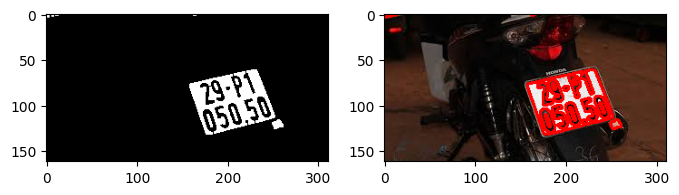

In [ ]:
#1 Find Contours
contour, hierachy = cv2.findContours(plate_th.copy(),
                                     cv2.RETR_CCOMP,
                                     cv2.CHAIN_APPROX_SIMPLE)

#2 Draw Contours
sample = plate.copy()
for i in range(len(contour)):
  test = cv2.drawContours(sample, contour, i, color=[255, 0, 0], thickness=2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(plate_th, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(test)

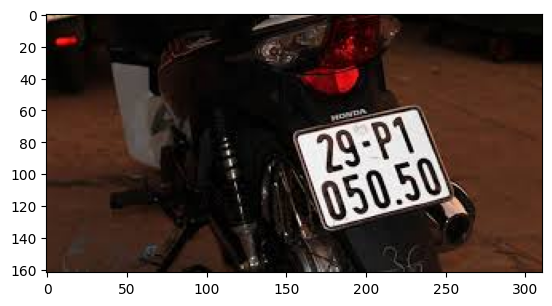

In [ ]:
test = plate.copy()
plt.imshow(test)

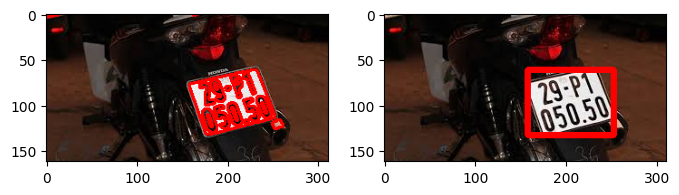

In [ ]:
# Find object
# Cach 1
MAX_w = 600
MIN_w = 50
test = plate.copy()
if len(contour) > 0:
  for c in contour:
    x, y, w, h = cv2.boundingRect(c)
    ar = w/h

    if(max(w, h) < MAX_w) and (min(w, h) > MIN_w) and (np.abs(1.0 - ar) < 0.5):
      cv2.rectangle(test, (x, y), (x+w, y+h), (255, 0, 0), 5)
      break

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(sample)

plt.subplot(1, 2, 2)
plt.imshow(test)

In [ ]:
print(len(contour))

16


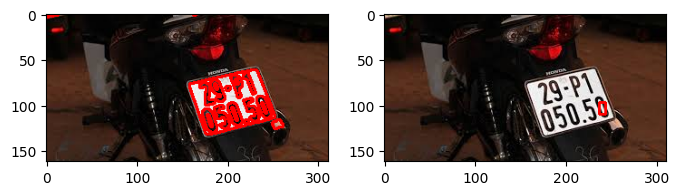

In [ ]:
# Cach 2
test = plate.copy()
for i in contour:
  x1, y1, w, h = cv2.boundingRect(contour[3])
  cv2.rectangle(test, (x1, y1), (x1+w, y1+h), color=[255, 0, 0], thickness=2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(sample)

plt.subplot(1, 2, 2)
plt.imshow(test)



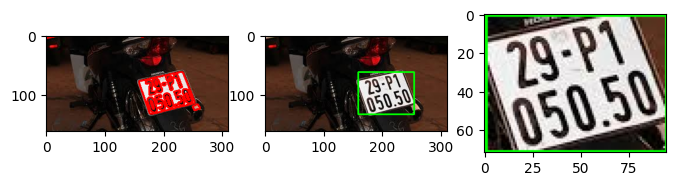

In [ ]:
#Cach 3
test = plate.copy()
area_cnt = [cv2.contourArea(cnt) for cnt in contour]
area_sort = np.argsort(area_cnt)[::-1]

cnt = contour[area_sort[0]]
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.figure(figsize = (8, 8))
cut_img = test[y:y+h, x:x+w]
plt.subplot(1, 3, 1)
plt.imshow(sample)

plt.subplot(1, 3, 2)
plt.imshow(test)

plt.subplot(1, 3, 3)
plt.imshow(cut_img)


In [ ]:
#Position of number plate in image
np_list = contour[area_sort[0]]
np_list = np.array(np_list)
count = 0
pos_x = []
pos_y = []
for i in range(np_list.shape[0]):
  tamthoi = np_list[i]
  pos_x.append(tamthoi[0][0])
  pos_y.append(tamthoi[0][1])

pos_x_soft = np.sort(pos_x)
pos_y_soft = np.sort(pos_y)

print(pos_x_soft)

[158 158 159 159 159 160 160 161 161 162 162 162 163 163 163 164 164 165
 165 166 166 167 167 167 168 168 168 169 169 170 170 171 171 171 172 172
 172 172 172 173 173 173 173 174 174 174 174 175 175 175 175 175 175 176
 176 176 176 176 177 177 179 179 180 180 181 182 183 183 183 183 183 184
 184 184 185 185 185 185 186 186 186 187 187 187 188 188 188 188 189 191
 192 193 194 195 196 197 198 198 199 202 202 203 203 203 203 204 204 204
 205 205 205 205 206 206 206 207 207 207 207 207 208 208 209 209 210 210
 210 210 210 211 211 211 212 212 213 213 213 214 214 214 214 214 214 215
 215 215 215 215 215 216 216 216 217 217 217 218 218 218 218 218 219 219
 219 219 219 219 219 220 220 220 220 220 221 221 221 221 221 221 221 221
 221 222 222 222 222 222 223 223 223 223 223 223 223 223 224 224 224 224
 224 224 224 225 225 225 225 225 225 225 225 225 226 226 226 226 226 226
 226 226 226 226 226 227 227 227 227 227 227 228 228 228 228 228 228 228
 228 229 229 229 229 229 229 229 229 230 230 230 23

In [ ]:
print(pos_y_soft)

[ 61  61  62  62  62  63  63  63  64  64  64  64  64  65  65  65  65  65
  66  66  67  67  67  67  67  67  67  68  68  68  68  68  68  68  68  69
  69  69  69  69  70  70  70  70  70  70  70  71  71  71  71  71  71  72
  72  72  72  72  72  73  73  73  73  73  73  74  74  74  74  74  74  75
  75  75  75  75  75  75  76  76  76  76  77  77  77  77  78  78  78  78
  79  79  79  80  80  80  81  81  81  81  81  81  82  82  82  82  83  83
  83  83  84  84  84  84  85  85  85  85  86  86  86  86  87  87  87  87
  87  87  87  88  88  88  88  89  89  90  90  90  90  91  92  92  92  92
  92  93  93  93  93  94  94  94  94  94  95  95  95  95  96  96  96  96
  97  97  97  98  98  98  99  99  99 100 100 100 101 101 101 101 102 102
 103 103 104 104 104 104 104 105 105 105 105 106 106 106 106 107 107 107
 107 107 107 107 108 108 108 108 109 109 109 110 110 110 110 110 111 111
 111 112 112 112 112 112 113 113 113 113 113 114 114 114 114 114 115 115
 115 115 116 116 116 116 116 116 116 116 117 117 11

In [ ]:
first_reach = pos_x_soft[0]
second_reach = pos_x_soft[-1]
third_reach = pos_y_soft[0]
four_reach = pos_y_soft[-1]
print(first_reach, second_reach, third_reach, four_reach)

158 252 61 132


In [ ]:
print(np_list)

[[[226  61]]

 [[225  62]]

 [[221  62]]

 [[221  64]]

 [[222  64]]

 [[223  65]]

 [[223  67]]

 [[224  68]]

 [[224  69]]

 [[225  70]]

 [[225  72]]

 [[226  73]]

 [[226  74]]

 [[227  75]]

 [[227  77]]

 [[228  78]]

 [[228  80]]

 [[229  81]]

 [[229  82]]

 [[230  83]]

 [[230  85]]

 [[231  86]]

 [[230  87]]

 [[229  87]]

 [[228  88]]

 [[227  87]]

 [[227  86]]

 [[226  85]]

 [[226  84]]

 [[225  83]]

 [[225  81]]

 [[224  80]]

 [[224  78]]

 [[223  77]]

 [[223  76]]

 [[222  75]]

 [[222  73]]

 [[221  72]]

 [[221  71]]

 [[218  71]]

 [[217  70]]

 [[217  67]]

 [[219  65]]

 [[219  63]]

 [[216  63]]

 [[215  64]]

 [[211  64]]

 [[210  65]]

 [[207  65]]

 [[207  67]]

 [[210  67]]

 [[211  68]]

 [[212  68]]

 [[214  70]]

 [[214  71]]

 [[215  72]]

 [[215  74]]

 [[216  75]]

 [[216  79]]

 [[214  81]]

 [[213  81]]

 [[213  86]]

 [[214  87]]

 [[214  88]]

 [[215  89]]

 [[215  90]]

 [[213  92]]

 [[212  92]]

 [[210  90]]

 [[210  87]]

 [[209  86]]

 [[209

###4 point need to Perspective Transform

In [ ]:
save1 = plate.shape[1]
for i in range(len(np_list)):
  tamthoi = np_list[i]
  if tamthoi[0][0] == first_reach:
    choose = tamthoi[0][1]
    if save1 >= choose:
      save1 = choose

print(first_reach, save1)


158 77


In [ ]:
save2 = 0
for i in range(len(np_list)):
  tamthoi = np_list[i]
  if tamthoi[0][0] == second_reach:
    choose = tamthoi[0][1]
    if save2 <= choose:
      save2 = choose

print(second_reach, save2)

252 113


In [ ]:
save3 = 0
for i in range(len(np_list)):
  tamthoi = np_list[i]
  if tamthoi[0][1] == third_reach:
    choose = tamthoi[0][0]
    if save3 <= choose:
      save3 = choose

print(save3, third_reach)

232 61


In [ ]:
save4 = plate.shape[1]
for i in range(len(np_list)):
  tamthoi = np_list[i]
  if tamthoi[0][1] == four_reach:
    choose = tamthoi[0][0]
    if save4 >= choose:
      save4 = choose

print(save4, four_reach)

176 132


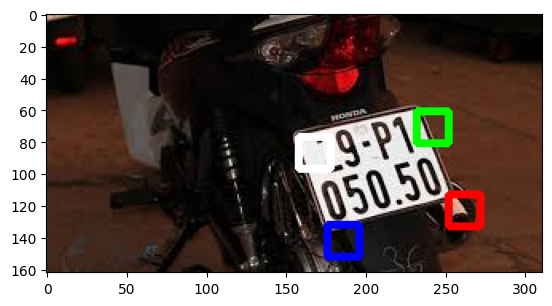

In [ ]:
#4 point for Perspective Transform: add 20 pixel to see correct the start point
test = plate.copy()
cv2.rectangle(test, (first_reach, save1), (first_reach+20, save1+20), (255, 255, 255), 3)
cv2.rectangle(test, (second_reach, save2), (second_reach+20, save2+20), (255, 0, 0), 3)
cv2.rectangle(test, (save3, third_reach), (save3+20, third_reach+20), (0, 255, 0), 3)
cv2.rectangle(test, (save4, four_reach), (save4+20, four_reach+20), (0, 0, 255), 3)
plt.imshow(test)

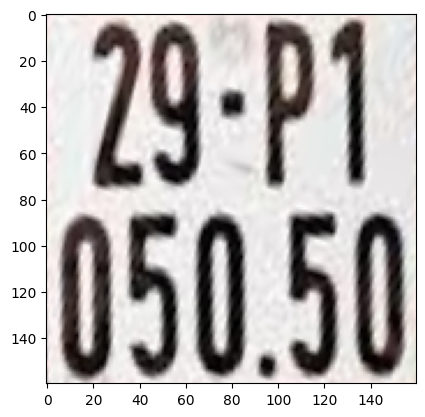

In [ ]:
test = plate.copy()
in_pts = np.float32([[first_reach, save1], [save3, third_reach],
                     [save4, four_reach],[second_reach, save2]])
out_pts = np.float32([[0, 0], [160, 0],
                      [0, 160], [160, 160]])

M = cv2.getPerspectiveTransform(in_pts,out_pts)
result = cv2.warpPerspective(test, M, (160, 160))

plt.imshow(result)

In [ ]:
result_gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
result_blur = cv2.blur(result_gray, (5, 5))
_, result_thresholding = cv2.threshold(result_gray, 150, 255, cv2.THRESH_BINARY_INV)
#result_canny = cv2.Canny(result_thresholding, 100, 200)
contour2, hierachy2 = cv2.findContours(result_thresholding.copy(),
                                     cv2.RETR_CCOMP,
                                     cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
len(contour2)

16

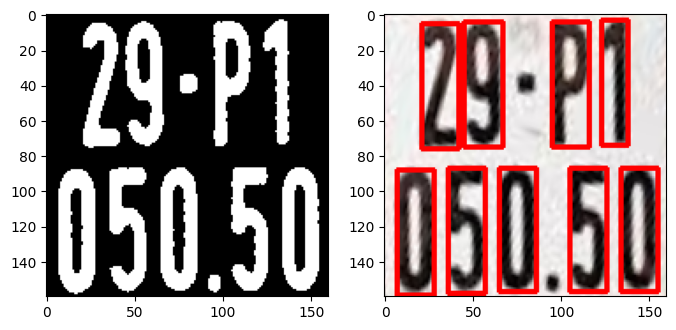

In [ ]:
test = result.copy()
paste = result.copy()
#test = 255-test
count=0
each_nb = []
for i in range(len(contour2)):
  if hierachy2[0][i][3] == -1:
    x1, y1, w, h = cv2.boundingRect(contour2[i])

    #Because the number in plate always longer than width/3
    if h >= (test.shape[1]/3):
      #Add position into each number for next step
      each_nb.append((paste[y1:y1+h, x1:x1+w], y1, x1))
      a = cv2.rectangle(test, (x1, y1), (x1+w, y1+h), color=[255, 0, 0], thickness=2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(result_thresholding, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(a, 'gray')

In [ ]:
print(each_nb[0][2])

7


In [ ]:
#Divide to Top and Bot Number
final = []

on_Top = []
on_Bot = []
for i in range(len(each_nb)):
  if each_nb[i][1] < result.shape[1]/2:
    on_Top.append(each_nb[i][2])
  else:
    on_Bot.append(each_nb[i][2])

on_Top = np.sort(on_Top)
on_Bot = np.sort(on_Bot)

#Add each position to final follow direction: top - bot, left - right
for j in range(len(on_Top)):
  for i in range(len(each_nb)):
    if (each_nb[i][1] < result.shape[0]/2) and (each_nb[i][2] == on_Top[j]):
      final.append(each_nb[i][0])

for j in range(len(on_Bot)):
  for i in range(len(each_nb)):
    if (each_nb[i][1] >= result.shape[0]/2) and (each_nb[i][2] == on_Bot[j]):
      final.append(each_nb[i][0])

In [ ]:
print(on_Top)
print(on_Bot)

[ 21  45  95 123]
[  7  36  65 105 134]


###Top of plate

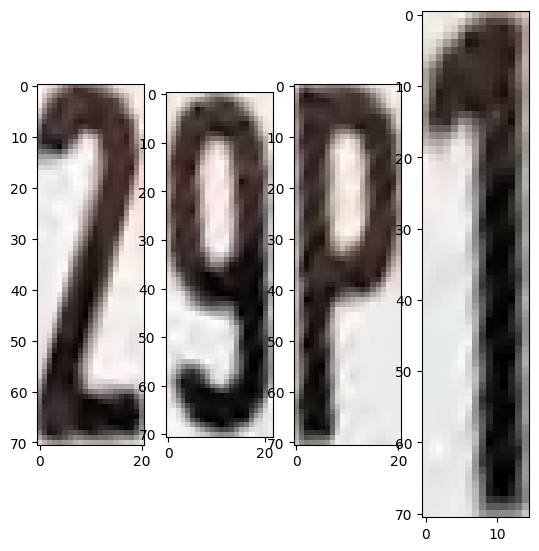

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(len(on_Top)):
  plt.subplot(1, 5, i+1)
  plt.imshow(final[i])

###Bot of plate

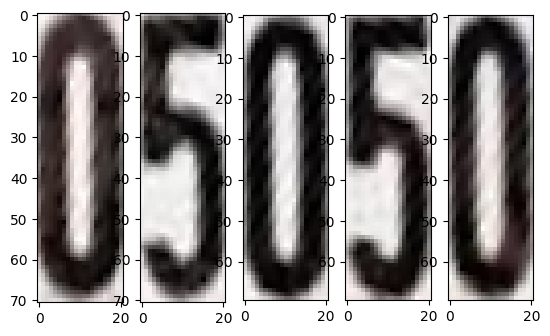

In [ ]:
for i in range(len(on_Bot)):
  plt.subplot(1, len(on_Bot), i+1)
  plt.imshow(final[i+len(on_Bot)-1])

In [ ]:
def returnNumber_of_Plate(img):
  #Convert gray image
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  img_blur = cv2.blur(img_gray, (3, 3))
  img_canny = cv2.Canny(img_blur, 100, 200)
  img_design = cv2.addWeighted(img_gray, 0.7, img_canny, 0.3, 0)
  img_blur2 = cv2.blur(img_design, (3, 3))
  _, img_th = cv2.threshold(img_blur2, 127, 255, cv2.THRESH_BINARY)
  #img_dilated = cv2.dilate(img_gray, kernel = np.ones((5, 5)), iterations=2)

  # Give contour from image
  contour, hierachy = cv2.findContours(img_th,
                                     cv2.RETR_CCOMP,
                                     cv2.CHAIN_APPROX_SIMPLE)

  #Check size of all contour
  area_cnt = [cv2.contourArea(cnt) for cnt in contour]
  area_sort = np.argsort(area_cnt)[::-1]

  #Position of number plate in image (which contour largest)
  np_list = contour[area_sort[0]]
  np_list = np.array(np_list)
  pos_x = []      #Give x
  pos_y = []      #Give y
  for i in range(np_list.shape[0]):
    tamthoi = np_list[i]
    pos_x.append(tamthoi[0][0])
    pos_y.append(tamthoi[0][1])

  pos_x_soft = np.sort(pos_x)
  pos_y_soft = np.sort(pos_y)

  #Take the 4 lowest and highest peaks of the contour
  first_reach = pos_x_soft[0]
  second_reach = pos_x_soft[-1]
  third_reach = pos_y_soft[0]
  four_reach = pos_y_soft[-1]

  #Convert and comparison which each point for Perspective Transform
  #Point 1 (Leftest)
  save1 = plate.shape[1]
  for i in range(len(np_list)):
    tamthoi = np_list[i]
    if tamthoi[0][0] == first_reach:
      choose = tamthoi[0][1]
      if save1 >= choose and (np.abs(choose - third_reach)+np.abs(choose-four_reach)>=50):
        save1 = choose

  #Point 2 (Rightest)
  save2 = 0
  for i in range(len(np_list)):
    tamthoi = np_list[i]
    if tamthoi[0][0] == second_reach:
      choose = tamthoi[0][1]
      if save2 <= choose:
        save2 = choose

  #Point 3 (Highest)
  save3 = 0
  for i in range(len(np_list)):
    tamthoi = np_list[i]
    if tamthoi[0][1] == third_reach:
      choose = tamthoi[0][0]
      if save3 <= choose:
        save3 = choose

  #Point 4 (Lowest)
  save4 = plate.shape[1]
  for i in range(len(np_list)):
    tamthoi = np_list[i]
    if tamthoi[0][1] == four_reach:
      choose = tamthoi[0][0]
      if save4 >= choose:
        save4 = choose

  # # Check 4 point (don't need in real code)
  # test = img.copy()
  # cv2.rectangle(test, (first_reach, save1), (first_reach+20, save1+20), (255, 255, 255), 3)
  # cv2.rectangle(test, (second_reach, save2), (second_reach+20, save2+20), (255, 0, 0), 3)
  # cv2.rectangle(test, (save3, third_reach), (save3+20, third_reach+20), (0, 255, 0), 3)
  # cv2.rectangle(test, (save4, four_reach), (save4+20, four_reach+20), (0, 0, 255), 3)
  # return test

  # Perspective Transform
  if save1 < save2 and np.abs(save1-third_reach) + np.abs(first_reach-save3) >= 50: in_pts = np.float32([[first_reach, save1], [save3, third_reach], [save4, four_reach],[second_reach, save2]])        # 1-3-4-2
  elif save2 < save1 and np.abs(save1-third_reach) + np.abs(first_reach-save3) >= 50: in_pts = np.float32([[save3, third_reach], [second_reach, save2], [first_reach, save1], [save4, four_reach]])    # 3-2-1-4
  #Special condition when the the object is almost not tilted make 1 similar 3, 2 similar 4 (Give 1 and 2)
  elif np.abs(save1-third_reach) + np.abs(first_reach-save3) <= 50: in_pts = np.float32([[first_reach, save1], [second_reach, save1], [first_reach, save2], [second_reach, save2]])
  out_pts = np.float32([[0, 0], [160, 0],
                        [0, 160], [160, 160]])

  M = cv2.getPerspectiveTransform(in_pts,out_pts)
  result = cv2.warpPerspective(img, M, (160, 160))

  #return result

  # Tạo ảnh mới có kích thước mở rộng
  rs_expand_img = cv2.copyMakeBorder(result, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=(255, 255, 255))
  #Threshold for to next step --> return number
  result_gray = cv2.cvtColor(rs_expand_img, cv2.COLOR_RGB2GRAY)

  result_ivt = 255 - result_gray
  result_dilated = cv2.dilate(result_ivt, kernel = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], np.uint8), iterations=1)
  result_ivt2 = 255 - result_dilated
  result_blur = cv2.blur(result_ivt2, (3, 3))
  _, result_th = cv2.threshold(result_blur, 160, 255, cv2.THRESH_BINARY)
  result_canny = cv2.Canny(result_th, 100, 200)
  contour2, hierachy2 = cv2.findContours(result_canny.copy(),
                                      cv2.RETR_CCOMP,
                                      cv2.CHAIN_APPROX_SIMPLE)

  # sample = rs_expand_img.copy()
  # for i in range(len(contour2)):
  #   test = cv2.drawContours(sample, contour2, i, color=[255, 0, 0], thickness=1)
  # return test
  #Give contour of each number
  each_nb = []
  for i in range(len(contour2)):
    if hierachy2[0][i][3] == -1:
      x1, y1, w, h = cv2.boundingRect(contour2[i])

      #Because the number in plate always longer than height/3 and need suitabel with width
      if ((rs_expand_img.shape[1]/3) < h < (rs_expand_img.shape[1]/2) ) and (10 < w < 30):
        #Add position into each number for next step
        each_nb.append([rs_expand_img[y1:y1+h, x1:x1+w], y1, x1])
  #       a = cv2.rectangle(rs_expand_img, (x1, y1), (x1+w, y1+h), color=[255, 0, 0], thickness=2)       #Check for
  # plt.imshow(a, 'gray')

  #Divide to Top and Bot Number
  final = []

  on_Top = []
  on_Bot = []

  for i in range(len(each_nb)):
    if each_nb[i][1] < rs_expand_img.shape[1]/2:
      on_Top.append(each_nb[i][2])
    else:
      on_Bot.append(each_nb[i][2])

  on_Top = np.sort(on_Top)
  on_Bot = np.sort(on_Bot)

  #Add each position to final follow direction: top - bot, left - right
  for j in range(len(on_Top)):
    for i in range(len(each_nb)):
      if (each_nb[i][1] < rs_expand_img.shape[0]/2) and (each_nb[i][2] == on_Top[j]):
        final.append(each_nb[i][0])

  for j in range(len(on_Bot)):
    for i in range(len(each_nb)):
      if (each_nb[i][1] >= rs_expand_img.shape[0]/2) and (each_nb[i][2] == on_Bot[j]):
        final.append(each_nb[i][0])
  return final

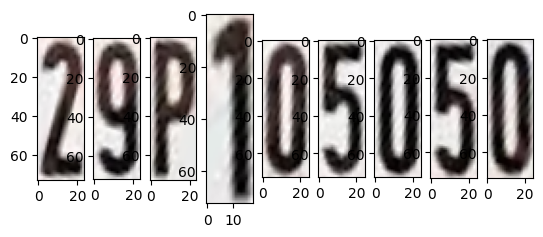

In [ ]:
rs = returnNumber_of_Plate(cv2.cvtColor(cv2.imread('/content/plate.jpg'), cv2.COLOR_BGR2RGB))
# plt.imshow(rs)
for i in range(len(rs)):
  plt.subplot(1, len(rs), i+1)
  plt.imshow(rs[i])


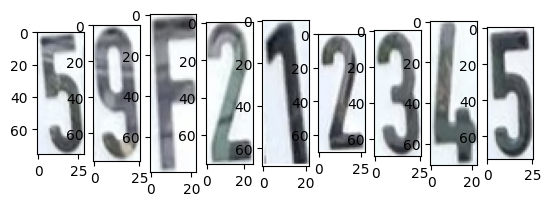

In [ ]:
rs2 = returnNumber_of_Plate(cv2.cvtColor(cv2.imread('/content/plate3.jpg'), cv2.COLOR_BGR2RGB))
# plt.imshow(rs2,'gray')
for i in range(len(rs2)):
  plt.subplot(1, len(rs2), i+1)
  plt.imshow(rs2[i])

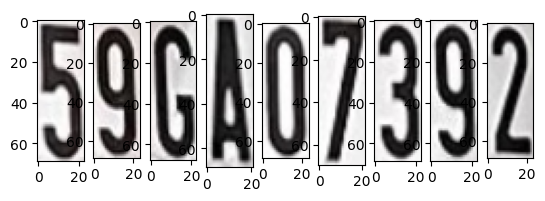

In [ ]:
rs3 = returnNumber_of_Plate(cv2.cvtColor(cv2.imread('/content/plate4.jpg'), cv2.COLOR_BGR2RGB))
#plt.imshow(rs3)
for i in range(len(rs3)):
  plt.subplot(1, len(rs3), i+1)
  plt.imshow(rs3[i])

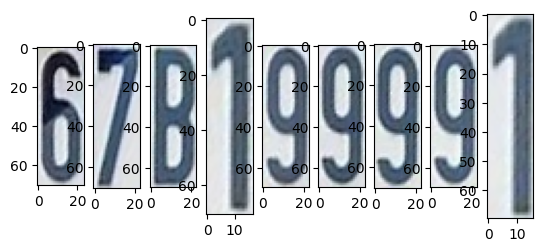

In [ ]:
rs4 = returnNumber_of_Plate(cv2.cvtColor(cv2.imread('/content/plate5.jpg'), cv2.COLOR_BGR2RGB))
#plt.imshow(rs4)
for i in range(len(rs4)):
  plt.subplot(1, len(rs4), i+1)
  plt.imshow(rs4[i])

In [ ]:
printed_LandD = []
printed_dictionary2 = {}

for i in range(26):
    printed_LandD.append(chr(ord('A') + i))

for i in range(10):
    printed_LandD.append(f'{i}')

for i in range(36):
  printed_dictionary2[printed_LandD[i]] = i

print(printed_dictionary2)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, '0': 26, '1': 27, '2': 28, '3': 29, '4': 30, '5': 31, '6': 32, '7': 33, '8': 34, '9': 35}


In [ ]:
def use_LandD_model(img, model):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_resize = cv2.resize(img_gray, (64, 64))
  img_blur = cv2.blur(img_resize, (3, 3))
  _, img_th = cv2.threshold(img_blur, 160, 255, cv2.THRESH_BINARY_INV)
  img_ivt = 255-img_th
  inp = img_ivt/255.
  # return inp
  inp_reshaped = inp.reshape((1, 64, 64, 1))

  outp = model.predict(inp_reshaped)
  for key, val in printed_dictionary2.items():
    if np.argmax(outp) == val:
      return key


In [ ]:
from tensorflow.keras.models import load_model
m = load_model('/content/prited_LandD.h5')

In [ ]:
rs = returnNumber_of_Plate(cv2.imread('/content/plate6.jpg'))
# plt.imshow(rs[1])
for i in range(len(rs)):
  # plt.subplot(1, len(rs), i+1)
  # plt.imshow(rs[i])
  print(use_LandD_model(rs[i], m))

1/1 [==============================] - 0s 154ms/step
2
1/1 [==============================] - 0s 33ms/step
9
1/1 [==============================] - 0s 35ms/step
A
1/1 [==============================] - 0s 36ms/step
B
1/1 [==============================] - 0s 36ms/step
9
1/1 [==============================] - 0s 39ms/step
0
1/1 [==============================] - 0s 35ms/step
1
1/1 [==============================] - 0s 37ms/step
0
1/1 [==============================] - 0s 38ms/step
6
